На бесконечной координатной сетке находится муравей. Муравей может перемещаться на 1 клетку вверх (x,y+1), вниз (x,y-1), влево (x-1,y), вправо (x+1,y), по одной клетке за шаг.

Клетки, в которых сумма цифр в координате X плюс сумма цифр в координате Y больше чем 25 недоступны муравью. Например, клетка с координатами (59, 79) недоступна, т.к. 5+9+7+9=30, что больше 25.

Сколько клеток может посетить муравей, если его начальная позиция (1000,1000), (включая начальную клетку)?

# Решение

Рассмотрим границы решения. 

Находясь на горизонтали `y=1000` и выше, муравей не сможет уменьшить горизонтальную координату, так как сумма цифр координаты `y=999` превышает уставновленный предел в 25. Аналочно для вертикали `x=1000`.

Какую максимальную координату может достичь муравей двигаясь вдоль 1000-й вертикали/горизонтали?

In [1]:
# маскимальное число девяток
(25 - 1) // 9

In [2]:
# максимаьная добавка к максимуму девяток
(25 - 1) % 9

Таким образом, максимальный индекс будет равен `1699`. А это означает, что имеется отраниченное поле, на котором следует искать решение:


    (1000,1000), (1000,1699), (1699, 1000), (1699,1699)


Это квадрат со стороной 700. И для простоты можем сместить начало координт в точку (1000,1000) на время вычислений.

Создадим матрицу с "весами" координат. Так как отрезки на осях идентичные, то должны получить симметричную матрицу:

In [3]:
import numpy as np

In [4]:
axis = np.vectorize(lambda x: sum(map(int, str(x))) + 1)(range(700))
axis.shape

(700,)

In [5]:
sums = np.repeat(axis, axis.shape[0]).reshape(axis.shape[0], -1) + axis
sums

array([[ 2,  3,  4, ..., 24, 25, 26],
       [ 3,  4,  5, ..., 25, 26, 27],
       [ 4,  5,  6, ..., 26, 27, 28],
       ...,
       [24, 25, 26, ..., 46, 47, 48],
       [25, 26, 27, ..., 47, 48, 49],
       [26, 27, 28, ..., 48, 49, 50]])

In [6]:
# матрица квадратная
sums.shape

(700, 700)

In [7]:
# симметичная
(sums.T == sums).all()

True

In [8]:
# исключаем недостижимые точки
avail = sums < 26
avail

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
# ничего не потеряли, матрца также симметрична
(avail.T == avail).all()

True

In [10]:
# проверка количества достижимых клеток на границах поля
sum(avail[0]), sum(avail[1]), sum(avail[-2]), sum(avail[-1])

(699, 696, 1, 0)

### Графика

Посмотрим, где в принципе может находится муравей

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

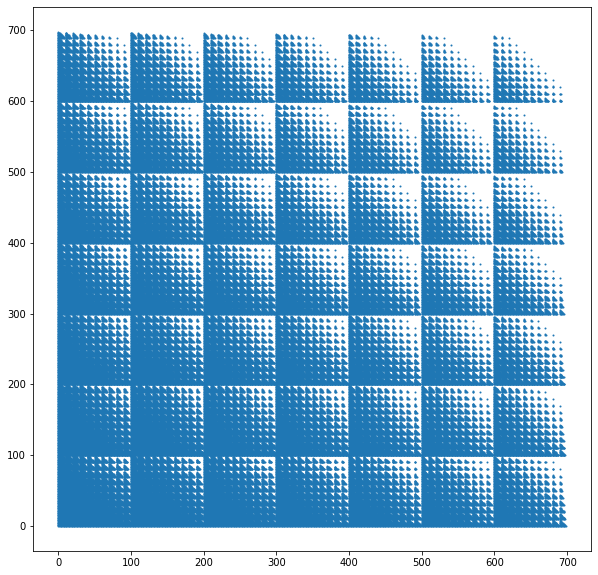

In [12]:
plt.figure(figsize=(10,10))
x,y = np.where(avail)
plt.scatter(x, y, s=1)

Как и ожидалось, имеем симметричную картинку с четкими границами десятков и именьшающимися "волнами" в сторону увеличения координат.

Посмотрим на график детальнее, областями 100х100

In [13]:
def plot_100x100(offset_x = 0, offset_y = 0):
    plt.figure(figsize=(10,10))
    size = 100
    x,y = np.where(avail[offset_x:offset_x+size, offset_y:offset_y+size])
    plt.scatter(x + offset_x, y + offset_y, s=1)

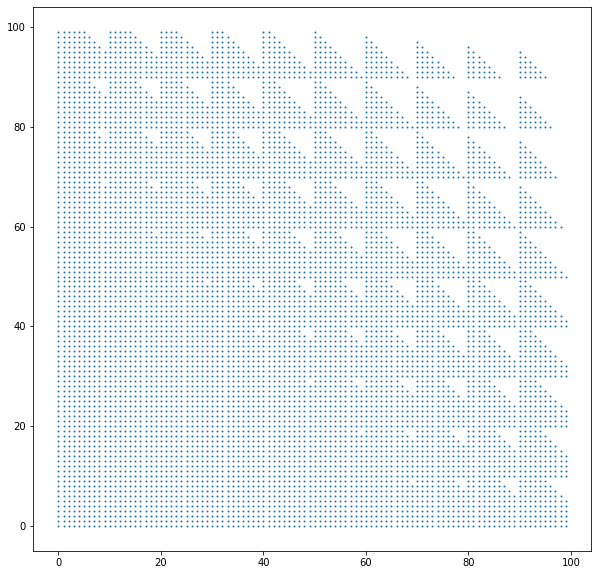

In [14]:
# начало координат
plot_100x100(0, 0)

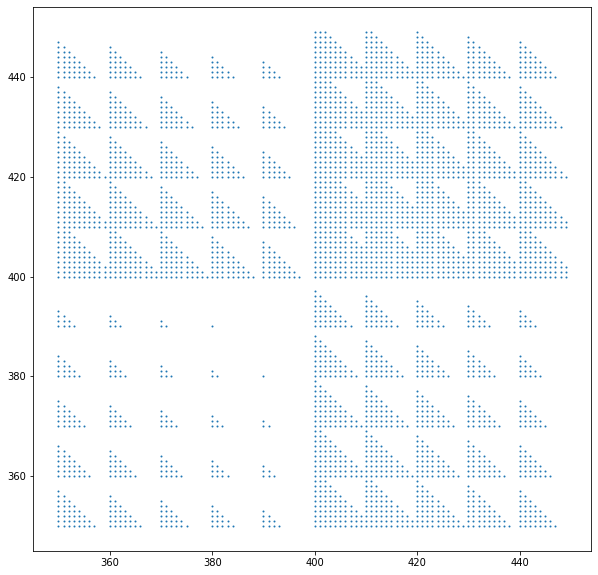

In [15]:
# центр поля
plot_100x100(350,350)

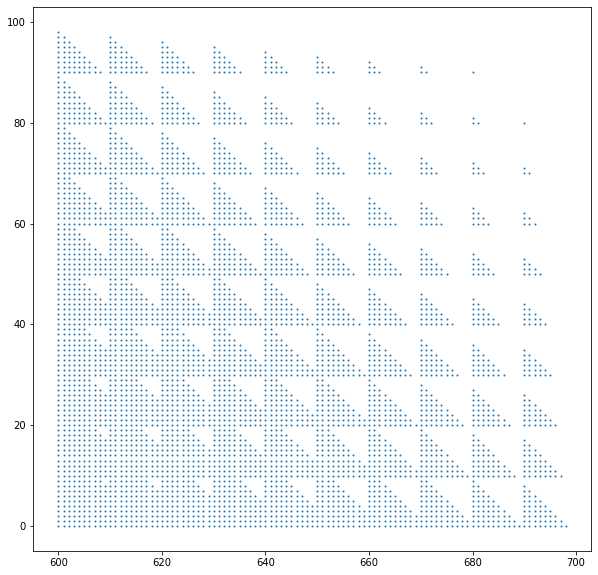

In [16]:
# правый нижний угол
plot_100x100(600,0)

Четко видна пустая диагональ. Но так как муравей не может ходть по диагонали, сможет сможет ли муравей пройти в верхнюю правую половину поля?

In [17]:
np.fliplr(avail).diagonal().sum()

0

Нет, доступных клеток нет, возможность перейти диагональ отсутствует. Поэтому можем сразу удалить правую верхнюю половину:

In [18]:
avail = np.flipud(np.tril(np.flipud(avail)))

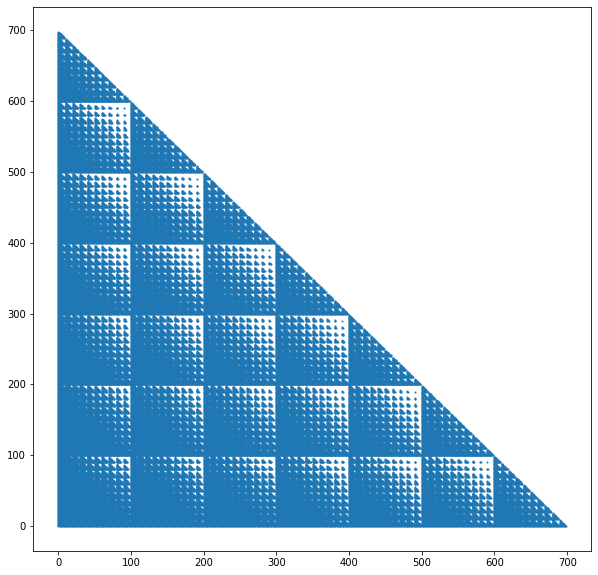

In [19]:
plt.figure(figsize=(10,10))
x,y = np.where(avail)
plt.scatter(x, y, s=1)

Видим, что муравей может находится на 160482 клетках, или трети всего поля

In [20]:
avail.sum(), round(avail.sum() / avail.size, 2)

(160482, 0.33)

### Окончательный ответ
А теперь для окончательного ответа, попробуем пройтись:

1) из исходной клетки 

In [21]:
start = (0,0)

2) делая шаги только на единицу по одной из координат

In [22]:
steps = np.array([[-1,0], [1,0], [0,-1], [0,1] ])
steps

array([[-1,  0],
       [ 1,  0],
       [ 0, -1],
       [ 0,  1]])

3) по всем непосредственно доступным клеткам.

In [23]:
%%time
news = {start}
past = {start}

while news:
    news = {tuple(candidat) for point in news 
        for candidat in point + steps
        if tuple(candidat) not in past and avail[tuple(candidat)]}
    past |= news


CPU times: user 3.59 s, sys: 794 µs, total: 3.59 s
Wall time: 3.59 s


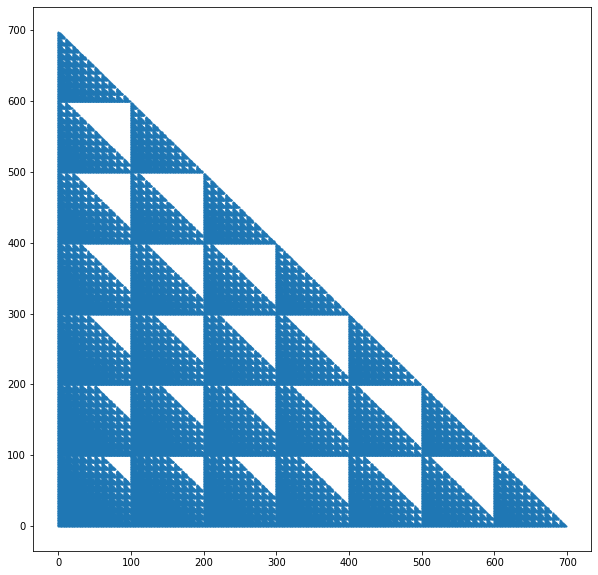

In [24]:
plt.figure(figsize=(10,10))

x, y = zip(*past)
plt.scatter(x, y, s=1)

острова вырезаны и теперь видно, что для посещения доступны только **148848** клеток - 30%

In [25]:
len(past), round(len(past) / avail.size, 2)

(148848, 0.3)

### Для отображения графика на JavaScript сохраним данные в файл.

Не трудно заметить, что для отображения полного графика нам достаточно отбражать в цикле первую сотню строк с соответствующим сдвигом по горизонтали.

Только первые 100 строк:

In [26]:
step = 100
points = sorted(filter(lambda x: x[1] < step, past))

сохраняем в файл `ant.js` данные для отрисовки

In [27]:
with open('ant.js', 'w') as f:
    f.write('var canvas_width=%s, canvas_height=%s, step=%%s, points=' % avail.shape % step)
    f.write(str([list(point) for point in points]))


теперь в открыв в браузере файл `ant.html` можно увидеть график, отображающий доступные муравью клетки...

### @todo

для улучшения реализации

- аналогичным образом "обрезать" внутренние острова, разделяя на квадраты 100х100, 10х10
- расматривать только половину (симметрия относительно главной диагонали)
- рисование по точкам заменить на:
    - отображение треугольников, и/или
    - объединить последовательности точек в линии